# Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels
import scipy
from scipy import stats
from scipy.stats import boxcox
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.metrics import ConfusionMatrixDisplay

# Read in Data

In [2]:
shelter = pd.read_csv(r'Animal_Shelter_Animals.csv')
pd.set_option('display.max_columns', None)
shelter.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False


# Analyze data
## Check Data Types

In [3]:
shelter.dtypes

id                   int64
intakedate          object
intakereason        object
istransfer            bool
sheltercode         object
identichipnumber    object
animalname          object
breedname           object
basecolour          object
speciesname         object
animalage           object
sexname             object
location            object
movementdate        object
movementtype        object
istrial               bool
returndate          object
returnedreason      object
deceaseddate        object
deceasedreason      object
diedoffshelter        bool
puttosleep            bool
isdoa                 bool
dtype: object

## View the sum of unique values in movementtype, speciesname and breedname

In [4]:
shelter.movementtype.value_counts()

Adoption            11105
Foster               4984
Reclaimed            2485
Transfer              711
None                   61
Released To Wild       36
Escaped                 9
Stolen                  8
Name: movementtype, dtype: int64

In [5]:
shelter.speciesname.value_counts()

Cat                 11708
Dog                  6661
House Rabbit          353
Guinea Pig            190
Rat                   165
Bird                   80
Livestock              40
Hamster                26
Mouse                  20
Hedgehog               18
Gerbil                 18
Snake                  14
Wildlife - other       14
Ferret                 14
Pig                    13
Lizard                 13
Chicken                10
Turtle                  8
Sugar Glider            7
Fish                    6
Opossum                 6
Goat                    5
Chinchilla              4
Tortoise                3
Squirrel                1
Raccoon                 1
Tarantula               1
Name: speciesname, dtype: int64

In [6]:
shelter.breedname.value_counts()

Domestic Short Hair                9645
Domestic Medium Hair                908
Bully Breed Mix                     640
Domestic Long Hair                  638
Labrador Retriever                  266
                                   ... 
Chihuahua/Wirehaired Terrier          1
Bully Breed Mix/Bulldog, French       1
Labrador Retriever/Pug                1
Golden Retriever/Hound                1
Rat Terrier/American Eskimo           1
Name: breedname, Length: 1077, dtype: int64

## Query for cat only and dog only information

In [7]:
Cat = shelter.query('speciesname == "Cat"')
Cat.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False
5,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,05/29/2018 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
13,46437,10/26/2016 12:00:00 AM,Abandoned,False,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,03/25/2017 12:00:00 AM,Foster,False,04/07/2017 12:00:00 AM,Stray,02/10/2018 12:00:00 AM,"UU - untreatable, unmanageable health",False,True,False
14,46437,10/26/2016 12:00:00 AM,Abandoned,False,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,04/07/2017 12:00:00 AM,Adoption,False,02/09/2018 12:00:00 AM,Incompatible with owner lifestyle,02/10/2018 12:00:00 AM,"UU - untreatable, unmanageable health",False,True,False


In [8]:
Cat.shape

(11708, 23)

In [9]:
Dog = shelter.query('speciesname == "Dog"')
Dog.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False
6,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,7 years 6 months.,Female,Stray Dogs Beta,03/30/2013 12:00:00 AM,Adoption,False,05/08/2017 12:00:00 AM,Incompatible with owner lifestyle,NaN,Died in care,False,False,False
7,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,7 years 6 months.,Female,Stray Dogs Beta,05/09/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False


In [10]:
Dog.shape

(6661, 23)

## Bar graph of movementtypes for cats only and dogs only

<AxesSubplot:title={'center':'Cat Movement Type'}>

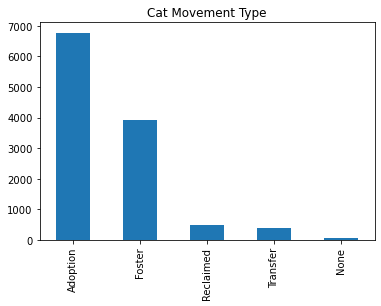

In [11]:
plt.title('Cat Movement Type')
Cat['movementtype'].value_counts().nlargest(5).plot.bar()

<AxesSubplot:title={'center':'Dog Movement Type'}>

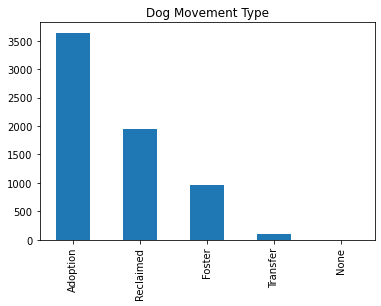

In [12]:
plt.title('Dog Movement Type')
Dog['movementtype'].value_counts().nlargest(5).plot.bar()

## Bar graph of intake reason for cats only and dogs only

<AxesSubplot:title={'center':'Cat Intake Reason'}>

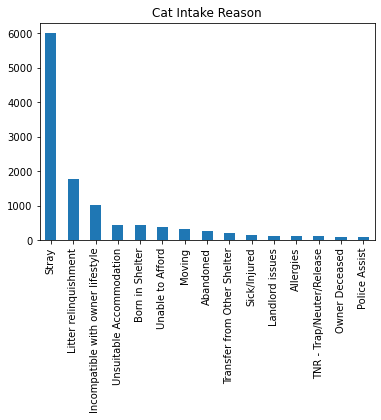

In [13]:
plt.title('Cat Intake Reason')
Cat['intakereason'].value_counts().nlargest(15).plot.bar()

<AxesSubplot:title={'center':'Dog Intake Reason'}>

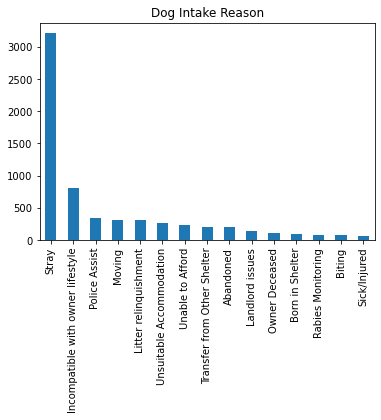

In [14]:
plt.title('Dog Intake Reason')
Dog['intakereason'].value_counts().nlargest(15).plot.bar()

## Analyze by species

In [15]:
speciesAnalysis = shelter.groupby('speciesname')
speciesAnalysis = speciesAnalysis.count()
speciesAnalysis = speciesAnalysis.sort_values(['animalage'], ascending=False)

In [16]:
speciesAnalysis.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
speciesname,,,,,,,,,,,,,,,,,,,,,,
Cat,11708,11708,11707,11708,11708,10676,11708,11708,11708,11708,11708,11708,11653,11708,11708,4411,11708,347,11708,11708,11708,11708
Dog,6661,6661,6661,6661,6661,5674,6661,6660,6661,6661,6661,6661,6657,6661,6661,2124,6661,187,6661,6661,6661,6661
House Rabbit,353,353,352,353,353,2,353,353,353,353,353,353,353,353,353,89,353,3,353,353,353,353
Guinea Pig,190,190,190,190,190,0,190,186,190,190,190,190,190,190,190,19,190,0,190,190,190,190
Rat,165,165,165,165,165,0,165,165,165,165,165,165,165,165,165,9,165,0,165,165,165,165


# Data Wrangling

## Split Dates and Remove Time

In [17]:
shelter1 = shelter['intakedate'].str.split(' ', expand = True).rename(columns = lambda x: "intakedate"+str(x+1))

In [18]:
shelter1.head()

,intakedate1,intakedate2,intakedate3
0,11/28/2009,12:00:00,AM
1,12/08/2009,12:00:00,AM
2,08/10/2012,12:00:00,AM
3,08/10/2012,12:00:00,AM
4,01/11/2013,12:00:00,AM


In [19]:
shelter2 = shelter['movementdate'].str.split(' ', expand = True).rename(columns = lambda x: "movementDate"+str(x+1))

In [20]:
shelter2.head()

,movementDate1,movementDate2,movementDate3
0,05/13/2017,12:00:00,AM
1,04/24/2017,12:00:00,AM
2,04/15/2017,12:00:00,AM
3,02/29/2020,12:00:00,AM
4,04/18/2017,12:00:00,AM


## Add split columns back and rename date-only columns

In [21]:
shelterUpdated = pd.concat([shelter, shelter1, shelter2], axis = 1)

In [22]:
shelterUpdated.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,intakedate1,intakedate2,intakedate3,movementDate1,movementDate2,movementDate3
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11/28/2009,12:00:00,AM,05/13/2017,12:00:00,AM
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,12/08/2009,12:00:00,AM,04/24/2017,12:00:00,AM
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,08/10/2012,12:00:00,AM,04/15/2017,12:00:00,AM
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,08/10/2012,12:00:00,AM,02/29/2020,12:00:00,AM
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,01/11/2013,12:00:00,AM,04/18/2017,12:00:00,AM


In [23]:
shelterUpdated.rename(columns={'intakedate1' : 'intakeDate', 'movementDate1' : 'movementDate'}, inplace=True)

In [24]:
shelterUpdated.drop(['intakedate', 'istransfer', 'sheltercode', 'identichipnumber', 'location', 'istrial', 'deceaseddate',
                     'deceasedreason', 'diedoffshelter', 'movementdate', 'returndate', 'returnedreason', 'puttosleep', 
                     'isdoa', 'intakedate2', 'intakedate3', 'movementDate2', 'movementDate3'], axis=1, inplace=True)

In [25]:
shelterUpdated.head()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate
0,15801,Moving,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoption,11/28/2009,05/13/2017
1,15932,Moving,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoption,12/08/2009,04/24/2017
2,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Adoption,08/10/2012,04/15/2017
3,28859,Abandoned,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Reclaimed,08/10/2012,02/29/2020
4,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Foster,01/11/2013,04/18/2017


In [26]:
uniqueAges = shelterUpdated['animalage'].unique()
print(sorted(uniqueAges))

['0 days.', '1 day.', '1 week.', '1 year 0 months.', '1 year 1 month.', '1 year 10 months.', '1 year 11 months.', '1 year 2 months.', '1 year 3 months.', '1 year 4 months.', '1 year 5 months.', '1 year 6 months.', '1 year 7 months.', '1 year 8 months.', '1 year 9 months.', '10 months.', '10 weeks.', '10 years 0 months.', '10 years 1 month.', '10 years 10 months.', '10 years 11 months.', '10 years 2 months.', '10 years 3 months.', '10 years 4 months.', '10 years 5 months.', '10 years 6 months.', '10 years 7 months.', '10 years 8 months.', '10 years 9 months.', '100 years 0 months.', '100 years 3 months.', '100 years 7 months.', '100 years 9 months.', '101 years 0 months.', '101 years 10 months.', '101 years 11 months.', '101 years 3 months.', '101 years 7 months.', '102 years 0 months.', '102 years 1 month.', '102 years 2 months.', '11 months.', '11 weeks.', '11 years 0 months.', '11 years 1 month.', '11 years 10 months.', '11 years 11 months.', '11 years 2 months.', '11 years 3 months.

In [28]:
shelterUpdated.info

<bound method DataFrame.info of           id                intakereason   animalname  \
0      15801                      Moving       Jadzia   
1      15932                      Moving        Gonzo   
2      28859                   Abandoned       Maggie   
3      28859                   Abandoned       Maggie   
4      30812                   Abandoned  Pretty Girl   
...      ...                         ...          ...   
19394  72253  Owner requested Euthanasia      Twinkie   
19395  72253  Owner requested Euthanasia      Twinkie   
19396  72260                      Moving        Ariel   
19397  72285             Landlord issues         Duke   
19398  72285             Landlord issues         Duke   

                     breedname              basecolour speciesname  \
0          Domestic Short Hair           Tortoiseshell         Cat   
1      German Shepherd Dog/Mix                     Tan         Dog   
2      Shep Mix/Siberian Husky                 Various         Dog   
3  

In [29]:
shelterUpdated.dropna(inplace = True)

In [32]:
def animalage (series):
    # Birth until 6-7 months of age
    if series == "0 days." or "1 day." or "2 days." or "3 days." or "4 days." or "5 days." or "1 week." or "2 weeks." or "3 weeks." or "4 weeks." or "5 weeks." or "6 weeks." or "7 weeks." or "8 weeks." or "9 weeks." or "10 weeks." or "11 weeks." or "12 weeks." or "14 weeks." or "15 weeks." or "16 weeks." or "17 weeks." or "18 weeks." or "19 weeks." or "20 weeks." or "21 weeks." or"22 weeks." or "23 weeks." or "24 weeks." or "25 weeks." or "26 weeks." or "6 months." or "7 months.":
        return "Kitten"
    # 8 month until 2 years old
    elif series == "8 months." or "9 months." or "10 months." or "11 months." or "1 year 0 months." or "1 year 1 month." or "1 year 10 months." or "1 year 11 months." or "1 year 2 months." or "1 year 3 months." or "1 year 4 months." or "1 year 5 months." or "1 year 6 months." or "1 year 7 months." or "1 year 8 months." or "1 year 9 months.":
        return "Junior"
    # 2-6 years old
    elif series == "2 years 0 months." or "2 years 1 month." or "2 years 10 months." or "2 years 11 months." or "2 years 2 months." or "2 years 3 months." or "2 years 4 months." or "2 years 5 months." or "2 years 6 months." or "2 years 7 months." or "2 years 8 months." or "2 years 9 months." or '3 years 0 months.' or "3 years 1 month." or "3 years 10 months." or "3 years 11 months." or "3 years 2 months." or "3 years 3 months." or "3 years 4 months." or "3 years 5 months." or "3 years 6 months." or "3 years 7 months." or "3 years 8 months." or "3 years 9 months." or "4 years 0 months." or "4 years 1 month." or "4 years 10 months." or "4 years 11 months." or "4 years 2 months." or "4 years 3 months." or "4 years 4 months." or "4 years 5 months." or "4 years 6 months." or "4 years 7 months." or "4 years 8 months." or "4 years 9 months." or "5 years 0 months." or "5 years 1 month." or "5 years 10 months." or "5 years 11 months." or "5 years 2 months." or "5 years 3 months." or "5 years 4 months." or "5 years 5 months." or "5 years 6 months." or "5 years 7 months." or "5 years 8 months." or "5 years 9 months." or "6 years 0 months." or "6 years 1 month." or "6 years 10 months." or "6 years 11 months." or "6 years 2 months." or "6 years 3 months." or "6 years 4 months." or "6 years 5 months." or "6 years 6 months." or "6 years 7 months." or "6 years 8 months." or "6 years 9 months.":
        return "Adult"
    # 7-10 years old
    elif series == '7 years 0 months.' or '7 years 1 month.' or '7 years 10 months.' or '7 years 11 months.' or '7 years 2 months.' or '7 years 3 months.' or '7 years 4 months.' or '7 years 5 months.' or '7 years 6 months.' or '7 years 7 months.' or '7 years 8 months.' or '7 years 9 months.' or '8 years 0 months.' or '8 years 1 month.' or '8 years 10 months.' or '8 years 11 months.' or '8 years 2 months.' or '8 years 3 months.' or '8 years 4 months.' or '8 years 5 months.' or '8 years 6 months.' or '8 years 7 months.' or '8 years 8 months.' or '8 years 9 months.' or '9 years 0 months.' or '9 years 1 month.' or '9 years 10 months.' or '9 years 11 months.' or '9 years 2 months.' or '9 years 3 months.' or '9 years 4 months.' or '9 years 5 months.' or '9 years 6 months.' or '9 years 7 months.' or '9 years 8 months.' or '9 years 9 months.' or '10 years 0 months.' or '10 years 1 month.' or '10 years 10 months.' or '10 years 11 months.' or '10 years 2 months.' or '10 years 3 months.' or '10 years 4 months.' or '10 years 5 months.' or '10 years 6 months.' or '10 years 7 months.' or '10 years 8 months.' or '10 years 9 months.':
        return "Mature"
    # 11-14 years old
    elif series == '11 years 0 months.' or '11 years 1 month.' or '11 years 10 months.' or '11 years 11 months.' or '11 years 2 months.' or '11 years 3 months.' or '11 years 4 months.' or '11 years 5 months.' or '11 years 6 months.' or '11 years 7 months.' or '11 years 8 months.' or '11 years 9 months.' or '12 years 0 months.' or '12 years 1 month.' or '12 years 10 months.' or '12 years 11 months.' or '12 years 2 months.' or '12 years 3 months.' or '12 years 4 months.' or '12 years 5 months.' or '12 years 6 months.' or '12 years 7 months.' or '12 years 8 months.' or '12 years 9 months.' or '13 years 0 months.' or '13 years 1 month.' or '13 years 10 months.' or '13 years 11 months.' or '13 years 2 months.' or '13 years 3 months.' or '13 years 4 months.' or '13 years 5 months.' or '13 years 6 months.' or '13 years 7 months.' or '13 years 8 months.' or '13 years 9 months.' or '14 years 0 months.' or '14 years 1 month.' or '14 years 10 months.' or '14 years 11 months.' or '14 years 2 months.' or '14 years 3 months.' or '14 years 4 months.' or '14 years 5 months.' or '14 years 6 months.' or '14 years 7 months.' or '14 years 8 months.' or '14 years 9 months.':
        return "Senior"
    # 15-38 years old
    elif series == '15 years 0 months.' or '15 years 1 month.' or '15 years 10 months.' or '15 years 11 months.' or '15 years 2 months.' or '15 years 3 months.' or '15 years 4 months.' or '15 years 5 months.' or '15 years 6 months.' or '15 years 7 months.' or '15 years 8 months.' or '15 years 9 months.' or '16 years 0 months.' or '16 years 1 month.' or '16 years 10 months.' or '16 years 11 months.' or '16 years 2 months.' or '16 years 3 months.' or '16 years 4 months.' or '16 years 6 months.' or '16 years 7 months.' or '16 years 8 months.' or '16 years 9 months.' or '17 years 0 months.' or '17 years 1 month.' or '17 years 3 months.' or '17 years 5 months.' or '17 years 6 months.' or '17 years 7 months.' or '17 years 8 months.' or '17 years 9 months.' or '18 years 0 months.' or '18 years 1 month.' or '18 years 2 months.' or '18 years 3 months.' or '18 years 4 months.' or '18 years 5 months.' or '18 years 8 months.' or '18 years 9 months.' or '19 years 0 months.' or '19 years 1 month.' or '19 years 11 months.' or '19 years 3 months.' or '19 years 7 months.' or '20 years 7 months.' or '21 years 10 months.' or '21 years 4 months.' or '21 years 8 months.' or '28 years 0 months.' or '28 years 11 months.' or '28 years 2 months.' or '28 years 6 months.' or '28 years 8 months.' or '28 years 9 months.' or '29 years 0 months.' or '29 years 4 months.' or '29 years 9 months.' or '30 years 0 months.' or '30 years 1 month.' or '30 years 10 months.' or '30 years 2 months.' or '30 years 4 months.' or '30 years 5 months.' or '30 years 6 months.' or '30 years 7 months.' or '30 years 8 months.' or '30 years 9 months.' or '31 years 0 months.' or '31 years 1 month.' or '31 years 10 months.' or '31 years 2 months.' or '31 years 3 months.' or '31 years 6 months.' or '32 years 0 months.' or '32 years 10 months.' or '32 years 2 months.' or '32 years 3 months.' or '32 years 6 months.' or '32 years 7 months.' or '33 years 0 months.' or '33 years 1 month.' or '33 years 10 months.' or '33 years 6 months.' or '34 years 2 months.' or '34 years 5 months.' or '34 years 6 months.' or '34 years 9 months.' or '35 years 1 month.' or '35 years 10 months.' or '35 years 5 months.' or '35 years 6 months.' or '35 years 8 months.' or '36 years 0 months.' or '37 years 4 months.':
        return "Geriatric"
    # Odd age entries
    elif series == '58 years 4 months.' or '972 years 6 months.' or '99 years 0 months.' or '99 years 1 month.' or '99 years 3 months.' or '99 years 5 months.' or '99 years 7 months.' or '100 years 0 months.' or '100 years 3 months.' or '100 years 7 months.' or '100 years 9 months.':
        return "Unknown"

shelterUpdated['animalage_group'] = shelterUpdated['animalage'].apply(animalage)

In [33]:
shelterUpdated.tail()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate,animalage_group
19393,72252,Stray,Chloe,Beagle,White and Black,Dog,16 years 0 months.,Female,Reclaimed,01/15/2022,01/16/2022,Kitten
19394,72253,Owner requested Euthanasia,Twinkie,Chihuahua,Tan and White,Dog,17 years 0 months.,Female,Foster,01/15/2022,01/20/2022,Kitten
19395,72253,Owner requested Euthanasia,Twinkie,Chihuahua,Tan and White,Dog,17 years 0 months.,Female,Adoption,01/15/2022,01/24/2022,Kitten
19396,72260,Moving,Ariel,Domestic Short Hair,Black,Cat,4 years 0 months.,Female,Transfer,01/18/2022,01/19/2022,Kitten
19397,72285,Landlord issues,Duke,Shih Tzu,"Brown, Black and White",Dog,1 year 9 months.,Male,Foster,01/20/2022,01/20/2022,Kitten


In [34]:
Cat1 = shelterUpdated.query('speciesname == "Cat"')
Cat1.head()

,id,intakereason,animalname,breedname,basecolour,speciesname,animalage,sexname,movementtype,intakeDate,movementDate,animalage_group
0,15801,Moving,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoption,11/28/2009,05/13/2017,Kitten
4,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Foster,01/11/2013,04/18/2017,Kitten
5,30812,Abandoned,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Adoption,01/11/2013,05/29/2018,Kitten
13,46437,Abandoned,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Foster,10/26/2016,03/25/2017,Kitten
14,46437,Abandoned,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Adoption,10/26/2016,04/07/2017,Kitten
